# IDADM - Task 2
## Imports

In [1]:
import pandas as pd
import numpy as np
import ast

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

2022-01-15 01:57:40.317427: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-01-15 01:57:41.268805: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-15 01:57:41.269489: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-15 01:57:41.304850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 01:57:41.305266: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 245.91GiB/s
2022-01-15 01:57:41.305303: I tensorflow/stream_executor/platform/defa

## Data Preprocessing

In [2]:
lol_data = pd.read_csv('dataset/LeagueofLegends.csv')
lol_data

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,TCL,2018,Spring,Season,YC,0,1,SUP,34,"[0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ...",...,Veigar,"[500, 500, 632, 982, 1258, 1667, 2060, 2390, 2...",Zeitnot,Xayah,"[500, 500, 564, 1027, 1320, 1727, 1963, 2276, ...",SnowFlower,Rakan,"[500, 500, 566, 801, 1004, 1234, 1463, 1674, 1...","['Ornn', 'Kalista', 'Ryze', 'Alistar', 'Shen']",https://matchhistory.euw.leagueoflegends.com/e...
7616,TCL,2018,Spring,Season,GAL,0,1,DP,39,"[0, 0, -86, -39, -207, -349, -60, -140, 187, -...",...,Ryze,"[500, 500, 612, 1000, 1193, 1626, 1979, 2318, ...",Ruvelius,Caitlyn,"[500, 500, 621, 977, 1420, 1809, 2047, 2413, 2...",Japone,Braum,"[500, 500, 587, 790, 1107, 1335, 1472, 1616, 1...","['Zoe', 'KogMaw', 'JarvanIV', 'Ornn', 'Rengar']",https://matchhistory.euw.leagueoflegends.com/e...
7617,OPL,2018,Spring,Season,SIN,0,1,DW,24,"[0, -8, -6, 116, 103, -92, -470, -958, -1998, ...",...,Malzahar,"[500, 500, 615, 903, 1225, 1617, 1976, 2304, 2...",k1ng,Ezreal,"[500, 508, 592, 986, 1400, 1753, 2196, 2538, 3...",Cupcake,Taric,"[500, 500, 585, 770, 976, 1222, 1446, 1627, 19...","['Azir', 'Kalista', 'Braum', 'Maokai', 'Alistar']",https://matchhistory.na.leagueoflegends.com/en...
7618,OPL,2018,Spring,Season,LGC,1,0,TTC,35,"[0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ...",...,Veigar,"[500, 500, 561, 931, 1223, 1631, 1987, 2315, 2...",Low,Sivir,"[500, 500, 634, 930, 1304, 1691, 2042, 2384, 2...",Tilting,Janna,"[500, 500, 592, 788, 1006, 1251, 1490, 1704, 1...","['Kalista', 'Galio', 'Gnar', 'Jayce', 'Sejuani']",https://matchhistory.na.leagueoflegends.com/en...


In [3]:
champs = pd.concat([lol_data['blueTopChamp'], lol_data['blueJungleChamp'], lol_data['blueMiddleChamp'], lol_data['blueADCChamp'], lol_data['blueSupportChamp'],
                    lol_data['redTopChamp'], lol_data['redJungleChamp'], lol_data['redMiddleChamp'], lol_data['redADCChamp'], lol_data['redSupportChamp']]).unique()
champ_dict = {}
for idx, champ in enumerate(champs):
    champ_dict[champ] = idx

In [111]:
Y = lol_data['bResult'].to_numpy()
X = []
# n_features = 13
n_features = 293


for _, row in tqdm(lol_data.iterrows(), desc='Extracting data...', ncols=150):
    # Preprocess Data
    length = row['gamelength']
    X_i = np.zeros((length, n_features))

    X_i[:, 0] = ast.literal_eval(row['golddiff'])

    for team in ['b', 'r']:

        base = 0 if team == 'b' else 146
        # base = 0 if team == 'b' else 6

        kills_minutes = [int(kill[0]) for kill in ast.literal_eval(row[team + 'Kills'])]
        kills_i = [np.count_nonzero(np.array(kills_minutes) == minute) for minute in range(length)]
        X_i[:, base + 1] = kills_i

        towers_minutes = [(int(towers[0]), towers[2]) for towers in ast.literal_eval(row[team + 'Towers'])]
        towers_i = [0]

        for minute in range(1, length):
            score = towers_i[-1]
            for tower_minute in towers_minutes:
                if tower_minute[0] == minute:
                    if tower_minute[1] == 'NEXUS_TURRET':
                        score += 4
                    elif tower_minute[1] == 'BASE_TURRET':
                        score += 3
                    elif tower_minute[1] == 'INNER_TURRET':
                        score += 2
                    elif tower_minute[1] == 'OUTER_TURRET':
                        score += 1
            towers_i.append(score)
        X_i[:, base + 2] = towers_i

        inhibs_minutes = [int(inhib[0]) for inhib in ast.literal_eval(row[team + 'Inhibs'])]
        inhibs_i = [np.count_nonzero(np.array(inhibs_minutes) == minute) for minute in range(length)]
        X_i[:, base + 3] = inhibs_i

        dragons_minutes = [int(dragons[0]) for dragons in ast.literal_eval(row[team + 'Dragons'])]
        dragons_i = [np.count_nonzero(np.array(dragons_minutes) == minute) for minute in range(length)]
        X_i[:, base + 4] = np.cumsum(dragons_i)

        baron_minutes = [int(baron[0]) for baron in ast.literal_eval(row[team + 'Barons'])]
        baron_i = np.array([np.count_nonzero(np.array(baron_minutes) == minute) for minute in range(length)])
        baron_idx = np.where(baron_i == 1)[0]
        if len(baron_idx) > 0:
            for idxs in baron_idx:
                baron_i[idxs:idxs+3] = 1
        X_i[:, base + 5] = baron_i

        herald_minutes = [int(baron[0]) for baron in ast.literal_eval(row[team + 'Heralds'])]
        herald_i = [np.count_nonzero(np.array(herald_minutes) == minute) for minute in range(length)]
        X_i[:, base + 6] = herald_i

        team_ext = 'red' if team == 'r' else 'blue'
        for champ in [row[team_ext + 'TopChamp'], row[team_ext + 'JungleChamp'], row[team_ext + 'MiddleChamp'], row[team_ext + 'ADCChamp'], row[team_ext + 'SupportChamp']]:
            X_i[:, base + 7 + champ_dict[champ]] = 1

    X.append(np.array(X_i))

Extracting data...: 7620it [00:13, 550.97it/s]


In [115]:
X[0]

array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-1.400e+01,  0.000e+00,  0.000e+00, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [ 4.762e+03,  0.000e+00,  1.200e+01, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 4.686e+03,  3.000e+00,  1.200e+01, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 6.057e+03,  0.000e+00,  2.000e+01, ...,  0.000e+00,  0.000e+00,
         0.000e+00]])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.9, random_state=0)
print(len(X_train), len(Y_train), len(X_val), len(Y_val), len(X_test), len(Y_test))

5486 5486 610 610 1524 1524


In [24]:
sc = StandardScaler()

# non_one_hot = np.concatenate((list(range(7)), list(range(147, 153))))
# one_hot = np.concatenate((list(range(7, 147)), list(range(153, 293))))
#
# sc.fit(np.vstack(X_train)[:, non_one_hot])
# X_train = [np.hstack((sc.transform(x_sample[:60, non_one_hot]), x_sample[:60, one_hot])) for x_sample in X_train]
# X_val = [np.hstack((sc.transform(x_sample[:60, non_one_hot]), x_sample[:60, one_hot])) for x_sample in X_val]
# X_test = [np.hstack((sc.transform(x_sample[:60, non_one_hot]), x_sample[:60, one_hot])) for x_sample in X_test]

sc.fit(np.vstack(X_train))
X_train = [sc.transform(x_sample[:60]) for x_sample in X_train]
X_val = [sc.transform(x_sample[:60]) for x_sample in X_val]
X_test = [sc.transform(x_sample[:60]) for x_sample in X_test]

Y_train, Y_val, Y_test = [sample.reshape(-1, 1) for idx, sample in enumerate(Y_train)],\
                         [sample.reshape(-1, 1) for idx, sample in enumerate(Y_val)],\
                         [sample.reshape(-1, 1) for idx, sample in enumerate(Y_test)]

In [8]:
pca = PCA(n_components=100, whiten=True)
pca.fit(np.vstack(X_train))
X_train = [pca.transform(x_sample[:60]) for x_sample in X_train]
X_val = [pca.transform(x_sample[:60]) for x_sample in X_val]
X_test = [pca.transform(x_sample[:60])for x_sample in X_test]

Y_train, Y_val, Y_test = [sample.reshape(-1, 1) for idx, sample in enumerate(Y_train)],\
                         [sample.reshape(-1, 1) for idx, sample in enumerate(Y_val)],\
                         [sample.reshape(-1, 1) for idx, sample in enumerate(Y_test)]

## Data Visualization

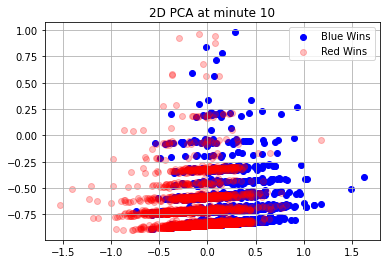

In [37]:
pca = PCA(n_components=2, whiten=True)
pca.fit(np.vstack(X_train))

X_train_plot_r = np.array([pca.transform([x_sample[10]]) for idx, x_sample in enumerate(X_train) if x_sample.shape[0] > 10 and Y_train[idx] == 1]).reshape(-1, 2)
X_train_plot_b = np.array([pca.transform([x_sample[10]]) for idx, x_sample in enumerate(X_train) if x_sample.shape[0] > 10 and Y_train[idx] == 0]).reshape(-1, 2)

plt.scatter(x=X_train_plot_b[:, 0], y=X_train_plot_b[:, 1], c='b', label='Blue Wins')
plt.scatter(x=X_train_plot_r[:, 0], y=X_train_plot_r[:, 1], alpha=0.25, c='r', label='Red Wins')
plt.legend()
plt.grid()
plt.title("2D PCA at minute 10")
plt.show()

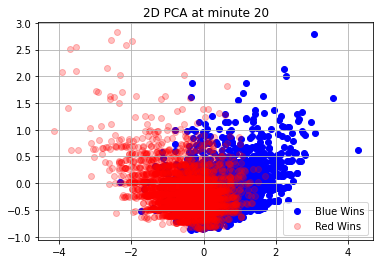

In [38]:
pca = PCA(n_components=2, whiten=True)
pca.fit(np.vstack(X_train))

X_train_plot_r = np.array([pca.transform([x_sample[20]]) for idx, x_sample in enumerate(X_train) if x_sample.shape[0] > 20 and Y_train[idx] == 1]).reshape(-1, 2)
X_train_plot_b = np.array([pca.transform([x_sample[20]]) for idx, x_sample in enumerate(X_train) if x_sample.shape[0] > 20 and Y_train[idx] == 0]).reshape(-1, 2)

plt.scatter(x=X_train_plot_b[:, 0], y=X_train_plot_b[:, 1], c='b', label='Blue Wins')
plt.scatter(x=X_train_plot_r[:, 0], y=X_train_plot_r[:, 1], alpha=0.25, c='r', label='Red Wins')
plt.legend()
plt.grid()
plt.title("2D PCA at minute 20")
plt.show()

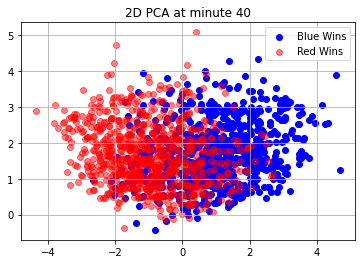

In [43]:
pca = PCA(n_components=2, whiten=True)
pca.fit(np.vstack(X_train))

X_train_plot_r = np.array([pca.transform([x_sample[40]]) for idx, x_sample in enumerate(X_train) if x_sample.shape[0] > 40 and Y_train[idx] == 1]).reshape(-1, 2)
X_train_plot_b = np.array([pca.transform([x_sample[40]]) for idx, x_sample in enumerate(X_train) if x_sample.shape[0] > 40 and Y_train[idx] == 0]).reshape(-1, 2)

plt.scatter(x=X_train_plot_b[:, 0], y=X_train_plot_b[:, 1], c='b', label='Blue Wins')
plt.scatter(x=X_train_plot_r[:, 0], y=X_train_plot_r[:, 1], alpha=0.5, c='r', label='Red Wins')
plt.legend()
plt.grid()
plt.title("2D PCA at minute 40")
plt.show()

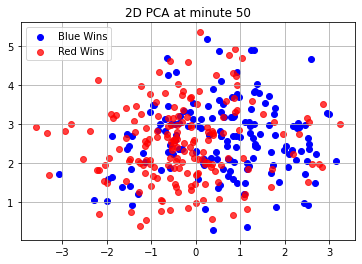

In [44]:
pca = PCA(n_components=2, whiten=True)
pca.fit(np.vstack(X_train))

X_train_plot_r = np.array([pca.transform([x_sample[50]]) for idx, x_sample in enumerate(X_train) if x_sample.shape[0] > 50 and Y_train[idx] == 1]).reshape(-1, 2)
X_train_plot_b = np.array([pca.transform([x_sample[50]]) for idx, x_sample in enumerate(X_train) if x_sample.shape[0] > 50 and Y_train[idx] == 0]).reshape(-1, 2)

plt.scatter(x=X_train_plot_b[:, 0], y=X_train_plot_b[:, 1], c='b', label='Blue Wins')
plt.scatter(x=X_train_plot_r[:, 0], y=X_train_plot_r[:, 1], alpha=0.75, c='r', label='Red Wins')
plt.legend()
plt.grid()
plt.title("2D PCA at minute 50")
plt.show()

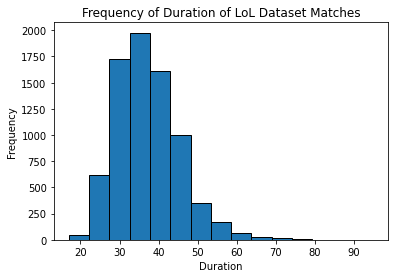

In [60]:
plt.hist([sample.shape[0] for sample in X], bins=15, edgecolor='k')
plt.title("Frequency of Duration of LoL Dataset Matches")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

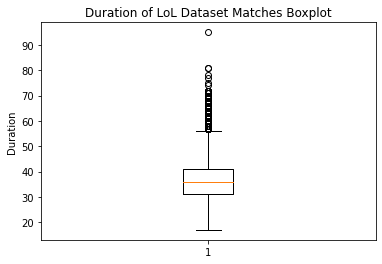

In [109]:
# plt.hist([sample.shape[0] for sample in X], bins=15, edgecolor='k', cumulative=True, weights=np.ones(len(X))/len(X))
plt.boxplot([sample.shape[0] for sample in X])
plt.title("Duration of LoL Dataset Matches Boxplot")
plt.ylabel("Duration")
plt.show()

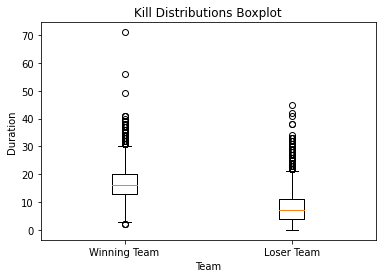

In [119]:
ax = plt.gca()
ax.boxplot([[np.sum(sample[:, 1]) if Y[idx] == 1 else np.sum(sample[:, 1+146]) for idx, sample in enumerate(X)],
             [np.sum(sample[:, 1+146]) if Y[idx] == 1 else np.sum(sample[:, 1]) for idx, sample in enumerate(X)]])
ax.set_xlabel("Team")
ax.set_ylabel("Duration")
ax.set_xticklabels(['Winning Team', 'Loser Team'])
plt.title("Kill Distributions Boxplot")
plt.show()

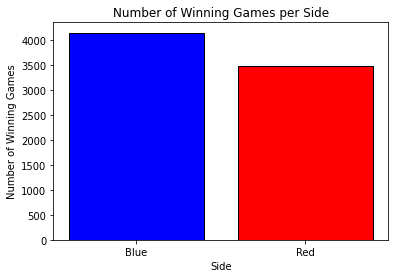

In [78]:
ax = plt.gca()
ax.bar(0, np.where(Y == 1)[0].shape[0], edgecolor='k', color='b')
ax.bar(1, np.where(Y == 0)[0].shape[0], edgecolor='k', color='r')
ax.set_xlabel("Side")
ax.set_ylabel("Number of Winning Games")
ax.set_xticks([0, 1])
ax.set_xticklabels(['Blue', 'Red'])
plt.title("Number of Winning Games per Side")
plt.show()

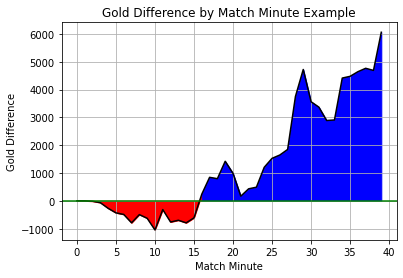

In [98]:
gold_diff = [minute[0] for minute in X[0]]

plt.plot(range(len(X[0])), gold_diff, color='k')
plt.axhline(0, c='g')
plt.fill_between(x=list(range(17)), y1=gold_diff[:17], y2=0, color='r')
plt.fill_between(x=list(range(16, len(X[0]))), y1=gold_diff[16:], y2=0, color='b')
plt.xlabel("Match Minute")
plt.ylabel("Gold Difference")
plt.grid()
plt.title("Gold Difference by Match Minute Example")
plt.show()

## Model

In [8]:
batch_size = 32
epochs = 5

model = Sequential()
model.add(LSTM(50, input_shape=(None, n_features)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

2022-01-15 01:42:58.889176: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-15 01:42:58.889325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 01:42:58.889593: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 245.91GiB/s
2022-01-15 01:42:58.889630: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-01-15 01:42:58.889648: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-01-15 01:42:58.889661: I tensorflow/stream_executor/platform/d

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                68800     
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 69,633
Trainable params: 69,633
Non-trainable params: 0
_________________________________________________________________


In [9]:
X_train[0].shape, Y_train[0].shape

((51, 100), (1, 1))

In [10]:
def train_set_generator():
    for i in range(len(X_train)):
        training_data = np.array(X_train[i])
        training_label = np.array(Y_train[i])
        yield (training_data[np.newaxis, :], training_label[np.newaxis, :])

def val_set_generator():
    for i in range(len(X_val)):
        val_data = np.array(X_val[i])
        val_label = np.array(Y_val[i])
        yield (val_data[np.newaxis, :], val_label[np.newaxis, :])

def test_set_generator(available_steps, filter_finished_matches=False):
    for i in range(len(X_test)):
        if filter_finished_matches and X_test[i].shape[0] < available_steps:
            continue
        test_data = np.array(X_test[i][:available_steps,:])
        test_label = np.array(Y_test[i])
        yield (test_data[np.newaxis, :], test_label[np.newaxis, :])

In [11]:
original_x_train_len, original_x_val_len = len(X_train), len(X_val)
X_train, Y_train, X_val, Y_val = X_train*epochs, Y_train*epochs, X_val*epochs, Y_val*epochs
history = model.fit(train_set_generator(), validation_data=val_set_generator(),  batch_size=batch_size, epochs=epochs,
                    steps_per_epoch=original_x_train_len // batch_size, validation_steps=original_x_val_len // batch_size)

2022-01-15 01:43:08.986055: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-15 01:43:09.005022: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/5


2022-01-15 01:43:10.045528: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-01-15 01:43:10.316627: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-01-15 01:43:10.333498: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


171/171 [==============================] - 3s 5ms/step - loss: 0.6258 - accuracy: 0.6520 - val_loss: 0.2685 - val_accuracy: 1.0000
Epoch 2/5
171/171 [==============================] - 0s 3ms/step - loss: 0.1653 - accuracy: 0.9801 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 3/5
171/171 [==============================] - 0s 3ms/step - loss: 0.1152 - accuracy: 0.9741 - val_loss: 0.0329 - val_accuracy: 1.0000
Epoch 4/5
171/171 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9725 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 5/5
171/171 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9937 - val_loss: 0.0527 - val_accuracy: 0.9474


## Evaluation

1524/1524 [==============================] - 2s 2ms/step - loss: 0.0563 - accuracy: 0.9902


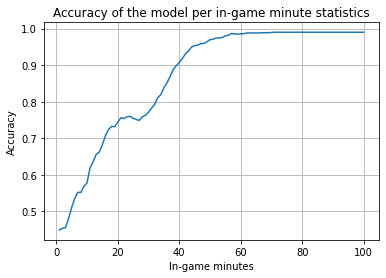

In [37]:
losses = []
accuracies = []
minutes = list(range(1, 61))
for available_steps in minutes:
    loss, accuracy = model.evaluate(test_set_generator(available_steps))
    losses.append(loss)
    accuracies.append(accuracy)

plt.plot(minutes, accuracies)
plt.grid()
plt.title('Accuracy of the model per in-game minute statistics')
plt.xlabel('In-game minutes')
plt.ylabel('Accuracy')
plt.show()

17/17 [==============================] - 0s 2ms/step - loss: 1.2472 - accuracy: 0.5294


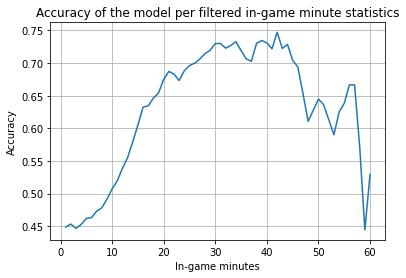

In [13]:
losses = []
accuracies = []
minutes = list(range(1, 61))
for available_steps in minutes:
    loss, accuracy = model.evaluate(test_set_generator(available_steps, filter_finished_matches=True))
    losses.append(loss)
    accuracies.append(accuracy)

plt.plot(minutes, accuracies)
plt.grid()
plt.title('Accuracy of the model per filtered in-game minute statistics')
plt.xlabel('In-game minutes')
plt.ylabel('Accuracy')
plt.show()

## With champions without PCA

17/17 [==============================] - 0s 2ms/step - loss: 1.0592 - accuracy: 0.6471


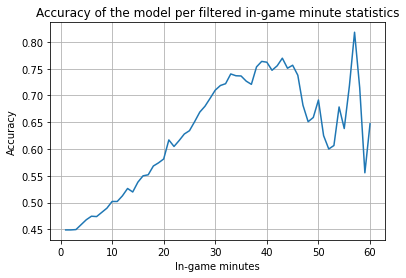

In [86]:
losses = []
accuracies = []
minutes = list(range(1, 61))
for available_steps in minutes:
    loss, accuracy = model.evaluate(test_set_generator(available_steps, filter_finished_matches=True))
    losses.append(loss)
    accuracies.append(accuracy)

plt.plot(minutes, accuracies)
plt.grid()
plt.title('Accuracy of the model per filtered in-game minute statistics')
plt.xlabel('In-game minutes')
plt.ylabel('Accuracy')
plt.show()

## With champions with PCA

17/17 [==============================] - 0s 2ms/step - loss: 0.7666 - accuracy: 0.7647


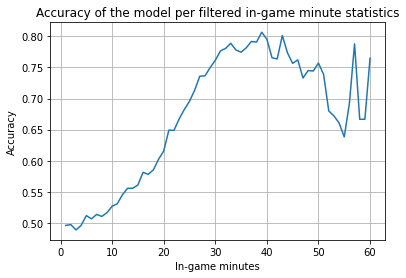

In [12]:
losses = []
accuracies = []
minutes = list(range(1, 61))
for available_steps in minutes:
    loss, accuracy = model.evaluate(test_set_generator(available_steps, filter_finished_matches=True))
    losses.append(loss)
    accuracies.append(accuracy)

plt.plot(minutes, accuracies)
plt.grid()
plt.title('Accuracy of the model per filtered in-game minute statistics')
plt.xlabel('In-game minutes')
plt.ylabel('Accuracy')
plt.show()